### Q10: What are the average sales of products sales per store monthly?

 ####    S1->M1-> avg_sales

 ####          s1-> M2 -> avg_sales

In [1]:
import psycopg2
import pandas as pd
import numpy as np
import psycopg2.extras
import matplotlib.pyplot as plt

In [2]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database = "ecomdb",
                                                  user = "postgres",
                                                  password = "sultanmahmud22",
                                                  host = "127.0.0.1",
                                                  port= "5432")
    def getConnection(self):
        print("Successfully connected to the database")
        return self.connection

con = PostgresConnection().getConnection()

Successfully connected to the database


In [10]:
con = PostgresConnection().getConnection()

cur = con.cursor()
select_stmt = "SELECT  it.supplier, tim.month, AVG(t.total_price) " \
"FROM star_schema.fact_table t  " \
"JOIN star_schema.store_dim s on s.store_key = t.store_key " \
"JOIN star_schema.time_dim tim on tim.time_key = t.time_key " \
"JOIN star_schema.trans_dim tr on tr.payment_key = t.payment_key " \
"JOIN star_schema.item_dim it on it.item_key = t.item_key  " \
"GROUP BY CUBE(it.supplier, tim.month) "\
"ORDER BY  it.supplier, tim.month "
cur.execute(select_stmt)
records = cur.fetchall()
records

df = pd.DataFrame(list(records), columns = ['Supplier', 'Month', 'Sales'])
df['Sales'] = df['Sales'].astype('float64')
df = df.dropna()
# df['Month'] = df['Month'].astype('object')
df


Successfully connected to the database


,Supplier,Month,Sales
0,BIGSO AB,1.0,119.695897
1,BIGSO AB,2.0,120.504792
2,BIGSO AB,3.0,119.231766
3,BIGSO AB,4.0,117.755057
4,BIGSO AB,5.0,118.518630
...,...,...,...
124,NINGBO SEDUNO IMP & EXP CO.LTD,8.0,102.512579
125,NINGBO SEDUNO IMP & EXP CO.LTD,9.0,103.988204
126,NINGBO SEDUNO IMP & EXP CO.LTD,10.0,102.444704
127,NINGBO SEDUNO IMP & EXP CO.LTD,11.0,105.566199


Text(0, 0.5, 'Average Sales of Suppliers Month wise')

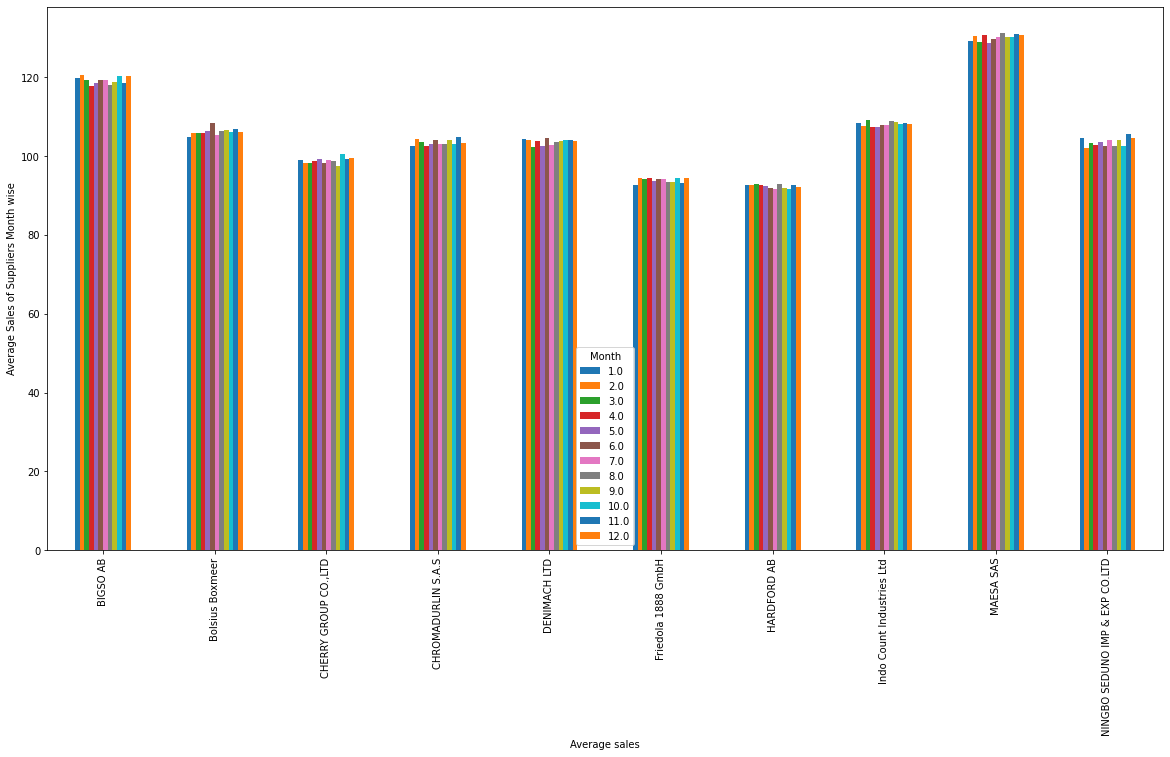

In [11]:
df_pivot = pd.pivot_table(df, values="Sales",index="Supplier", columns="Month")

ax = df_pivot.plot(kind="bar")

fig = ax.get_figure()

fig.set_size_inches(20, 10)

ax.set_xlabel("Average sales")
ax.set_ylabel("Average Sales of Suppliers Month wise")


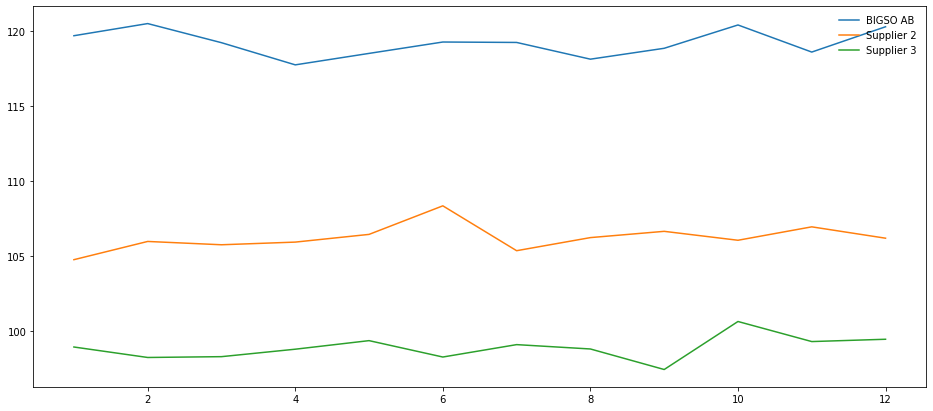

In [17]:
x1 = x2 = x3 =x4 =x5=x6=x7=x8=x9=x10= df.Month.values[:12]
y1 = df.Sales.values[0:12]
y2 = df.Sales.values[12:24] 
y3 = df.Sales.values[24:36]
# y4 = df.Sales.values[36:48]
# y5 = df.Sales.values[48:60] 
# y6 = df.Sales.values[60:72]
# y7 = df.Sales.values[72:84]
# y8 = df.Sales.values[84:96] 
# y9 = df.Sales.values[96:108]
# y10 = df.Sales.values[108:120]
fig, ax = plt.subplots(figsize =(16, 7))
plt.plot(x1, y1, label='BIGSO AB')
plt.plot(x2, y2, label='Supplier 2')
plt.plot(x3, y3, label='Supplier 3')
# plt.plot(x4, y4, label='S0001')
# plt.plot(x5, y5, label='S0002')
# plt.plot(x6, y6, label='S0003')
# plt.plot(x7, y7, label='S0001')
# plt.plot(x8, y8, label='S0002')
# plt.plot(x9, y9, label='S0003')
# plt.plot(x10, y10, label='S0003')
leg = plt.legend(loc='upper right', frameon=False);

In [20]:
con = PostgresConnection().getConnection()

cur = con.cursor()
select_stmt = "SELECT  t.store_key, tim.month, AVG(t.total_price) " \
"FROM star_schema.fact_table t  " \
"JOIN star_schema.store_dim s on s.store_key = t.store_key " \
"JOIN star_schema.time_dim tim on tim.time_key = t.time_key " \
"JOIN star_schema.trans_dim tr on tr.payment_key = t.payment_key " \
"JOIN star_schema.item_dim it on it.item_key = t.item_key  " \
"GROUP BY CUBE(t.store_key, tim.month) "\
"ORDER BY  t.store_key, tim.month "
cur.execute(select_stmt)
records = cur.fetchall()
records

df = pd.DataFrame(list(records), columns = ['Store', 'Month', 'Sales'])
df['Sales'] = df['Sales'].astype('float64')
df = df.dropna()
# df['Month'] = df['Month'].astype('object')
df


Successfully connected to the database


,Store,Month,Sales
0,S0001,1.0,97.754310
1,S0001,2.0,100.577670
2,S0001,3.0,109.415888
3,S0001,4.0,98.880531
4,S0001,5.0,99.524554
...,...,...,...
9432,S0099,8.0,96.293367
9433,S0099,9.0,114.136574
9434,S0099,10.0,102.789773
9435,S0099,11.0,107.381068


In [22]:
con = PostgresConnection().getConnection()

cur = con.cursor()
select_stmt = "SELECT  t.store_key, it.item_name, SUM(t.quantity) " \
"FROM star_schema.fact_table t  " \
"JOIN star_schema.store_dim s on s.store_key = t.store_key " \
"JOIN star_schema.time_dim tim on tim.time_key = t.time_key " \
"JOIN star_schema.trans_dim tr on tr.payment_key = t.payment_key " \
"JOIN star_schema.item_dim it on it.item_key = t.item_key  " \
"GROUP BY CUBE(t.store_key, it.item_name) "\
"ORDER BY  t.store_key "
cur.execute(select_stmt)
records = cur.fetchall()
records

df = pd.DataFrame(list(records), columns = ['Store', 'ItemName', 'Sales'])
df['Sales'] = df['Sales'].astype('float64')
df = df.dropna()
# df['Month'] = df['Month'].astype('object')
df


Successfully connected to the database


,Store,ItemName,Sales
0,S0001,100% Juice Box Variety 6.75 oz,10.0
1,S0001,A&W Root Beer - 12 oz cans,60.0
2,S0001,A&W Root Beer Diet - 12 oz cans,8.0
3,S0001,Advil 2 pill packets,28.0
4,S0001,All Purpose Cleaner 409 Spray,46.0
...,...,...,...
187834,S0099,Welch's 100% Juice Variety10 oz,45.0
187835,S0099,Wint O Green LifeSavers Sugar Free,47.0
187836,S0099,Wonderful Pistachios (in shell),22.0
187837,S0099,Yoplait Original Yogurt Variety Pack,29.0


In [25]:
df1 = df.groupby(['Store','ItemName']).agg({'Sales' : ['max']})
df1

Sales
                                              max
Store ItemName                                   
S0001 100% Juice Box Variety 6.75 oz         10.0
      A&W Root Beer - 12 oz cans             60.0
      A&W Root Beer Diet - 12 oz cans         8.0
      Advil 2 pill packets                   28.0
      All Purpose Cleaner 409 Spray          46.0
...                                           ...
S0099 Welch's 100% Juice Variety10 oz        45.0
      Wint O Green LifeSavers Sugar Free     47.0
      Wonderful Pistachios (in shell)        22.0
      Yoplait Original Yogurt Variety Pack   29.0
      Zoo Animal Cookies/Crackers            45.0

[187114 rows x 1 columns]